In [181]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import table
from datetime import datetime

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df_station = pd.read_csv('201508_station_data.csv')
df_station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [4]:
df_station.shape

(70, 7)

In [5]:
#df_station = df_station.set_index('dockcount').sort_index()
#df_station.sort_index(ascending =False).head() #(1,ascending =False)

In [6]:
df_status = pd.read_csv('201508_status_data.csv')
df_status.head()

,station_id,bikes_available,docks_available,time
0,2,15,12,2014-09-01 00:00:03
1,2,15,12,2014-09-01 00:01:02
2,2,15,12,2014-09-01 00:02:02
3,2,15,12,2014-09-01 00:03:03
4,2,15,12,2014-09-01 00:04:02


In [7]:
df_status.shape

(36647622, 4)

In [222]:
df_trip = pd.read_csv('201508_trip_data.csv')
df_trip.sort_values(by='Trip ID').head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
354151,432947,569,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,318,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354148,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354147,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118


In [223]:
df_trip.sort_values(by='Trip ID').tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139


In [200]:
df_trip.shape

(354152, 11)

In [10]:
df_weather = pd.read_csv('201508_weather_data.csv')
df_weather.head()

,PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,9/1/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0,0.0,NaN,290.0,94107
1,9/2/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0,5.0,NaN,290.0,94107
2,9/3/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0,4.0,NaN,276.0,94107
3,9/4/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0,5.0,NaN,301.0,94107
4,9/5/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0,4.0,NaN,309.0,94107


In [11]:
df_weather.shape

(1825, 24)

At first let us try to look at how the bike stations are distributed in the different cities.

In [87]:
df_station.landmark.value_counts() #number of stations in different cities

San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
Name: landmark, dtype: int64

Another way of finding the same thing

In [89]:
df2 = df_station.groupby('landmark').size() 
df2.sort_values(ascending=False)

landmark
San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
dtype: int64

Let's make a bar plot.

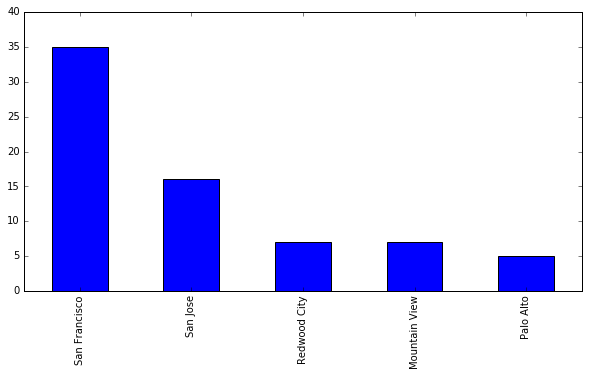

In [351]:
df_station.landmark.value_counts().plot.bar(figsize=(10,5),ylim =(0,40))

How about a pie plot?

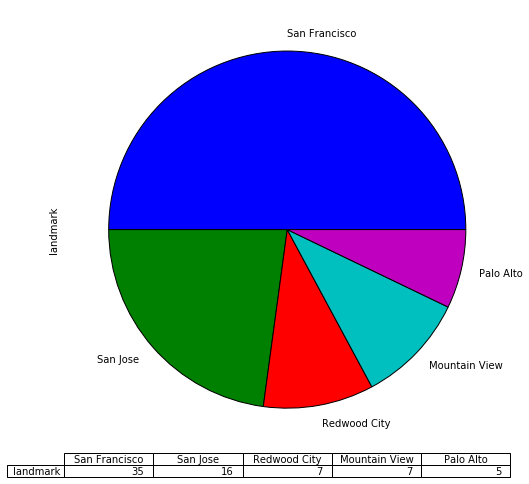

In [91]:
#df_station.landmark.value_counts().plot(kind='pie')
#df_station.landmark.value_counts().plot(kind='pie',figsize=(7,7),colormap='Dark2')
df_station.landmark.value_counts().plot(kind='pie',figsize=(8,8), table=True)

San Francisco has the bulk of the stations. To be exact half of all stations (35 of 70) reside in San Francisco.

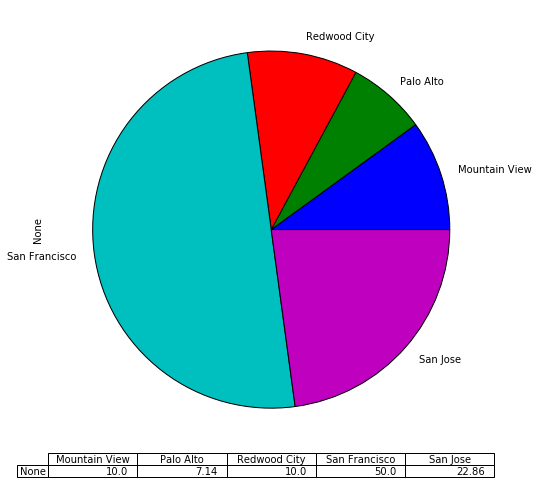

In [92]:
#station_pcts = df_station.groupby('landmark').size().apply(lambda x: 100*x/x.sum())
x = df_station.groupby('landmark').size()
station_pcts = 100*x/x.sum()
station_pcts = station_pcts.round(2)
station_pcts.plot(kind='pie',figsize=(8,8), table=True)

Let us also look at how many bicycle docks are available on those cities.

In [112]:
df_station.groupby('landmark').sum().dockcount #total bicycle docks 

landmark
Mountain View    117
Palo Alto         75
Redwood City     115
San Francisco    665
San Jose         264
Name: dockcount, dtype: int64

Let's make a bar plot and a pie plot like before.

In [137]:
#df_station.groupby('landmark').sum().dockcount.plot(kind='bar')

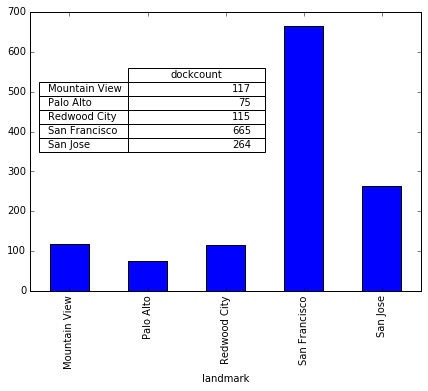

In [138]:
fig, ax = plt.subplots(1, 1)
df_station2 = df_station.groupby('landmark').sum().dockcount
#table(ax, np.round(df_station2, 1), loc='upper left')
table(ax, np.round(df_station2, 1),bbox=[0.25, 0.5, 0.35, 0.3]) #bbox used to place table in an appropriate place
df_station2.plot(kind ='bar',ax=ax, figsize=(7,5), ylim=(0, 700), legend=None)

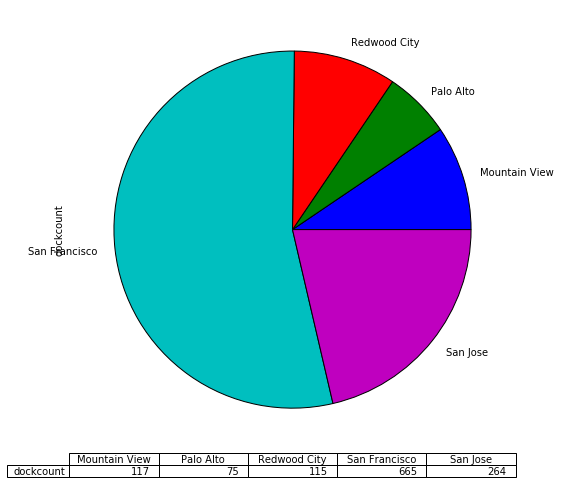

In [136]:
df_station.groupby('landmark').sum().dockcount.plot(kind='pie', figsize=(8,8), table=True)

What percentage of total bicycle docks are situated in the different cities?

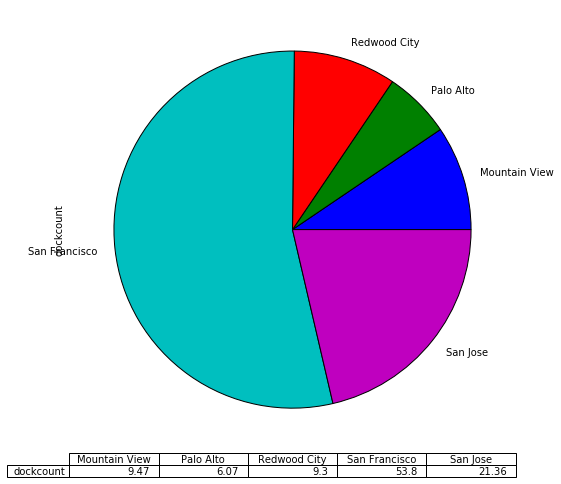

In [139]:
#station_pcts = df_station.groupby('landmark').size().apply(lambda x: 100*x/x.sum())
x = df_station.groupby('landmark').sum().dockcount
dock_pcts = 100*x/x.sum()
dock_pcts = dock_pcts.round(2)
dock_pcts.plot(kind='pie',figsize=(8,8), table=True)

Not only San Francisco has half of all stations, it also has 54% of all bicycle docks.

Let us also investigate how many trips originate in differernt cities.

In [201]:
df_trip.groupby('Start Station').sum().head()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
Start Station,,,,,
2nd at Folsom,5383062872,4346624,495938,501335,3509802
2nd at South Park,6264113955,6550724,606016,607608,4168685
2nd at Townsend,9493286606,10085491,855586,852574,6168957
5th at Howard,5189938745,6629794,439356,491317,3376924
Adobe on Almaden,381093606,930748,2810,3697,145357


The trip dataframe does not have information about cities (only stations), so we need to create a new dataframe merging the trip and station dataframes.

In [141]:
#df_station
df2_station = df_station[:] #Make a copy of the station dataframe so that we don't have to modify it.
#df2_station
df2_station = df2_station.rename(columns={'name':'Start Station'}) #rename station name so that it can be merged 
                                                                   #with the trip dataset
#df2_station
df2_trip = pd.merge(df_trip, df2_station) # create new dataframe by merging df_trip and df2_station
df2_trip.groupby('landmark').sum().dockcount.sort_values(ascending=False) #new dataframe has city info, 
                                                                          #so can be grouped by

landmark
San Francisco    6214892
San Jose          332256
Mountain View     182169
Palo Alto          50299
Redwood City       39235
Name: dockcount, dtype: int64

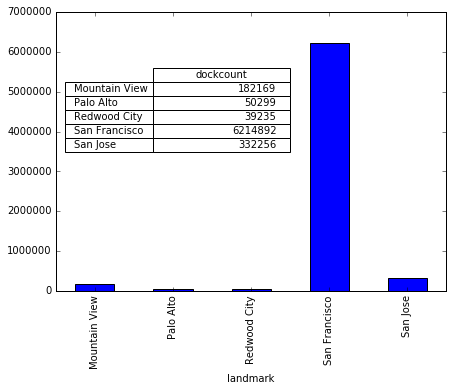

In [143]:
#df2_trip.groupby('landmark').sum().dockcount.plot(kind='bar')
######
fig, ax = plt.subplots(1, 1)
df3_trip = df2_trip.groupby('landmark').sum().dockcount
table(ax, np.round(df3_trip, 1),bbox=[0.25, 0.5, 0.35, 0.3]) #bbox used to place table in an appropriate place
df3_trip.plot(kind ='bar',ax=ax, figsize=(7,5), ylim=(0, 7000000), legend=None)

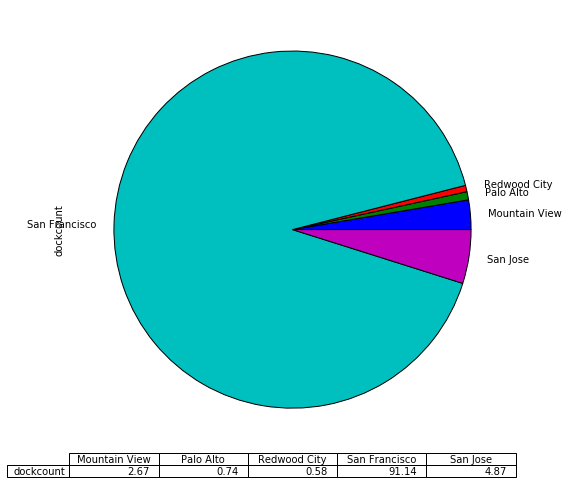

In [145]:
#df2_trip.groupby('landmark').sum().dockcount.plot(kind='pie', figsize=(7,7))
####
x = df3_trip
trip_pcts = 100*x/x.sum()
trip_pcts = trip_pcts.round(2)
trip_pcts.plot(kind='pie',figsize=(8,8), table=True)

More than 90% of all trips originate in San Francisco.

Let's try to plot a time series of all trips, i.e., let's find how many trips were taken on individual days over the year under consideration.

In [239]:
df_trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [240]:
df_trip.dtypes

Trip ID             int64
Duration            int64
Start Date         object
Start Station      object
Start Terminal      int64
End Date           object
End Station        object
End Terminal        int64
Bike #              int64
Subscriber Type    object
Zip Code           object
dtype: object

In [241]:
df_trip.groupby('Start Date').size().head()

Start Date
1/1/2015 0:25    1
1/1/2015 0:28    1
1/1/2015 0:30    1
1/1/2015 0:31    1
1/1/2015 0:32    1
dtype: int64

We need to group the trips by individual dates. For that I am going to convert the date column entries to Pamdas datetime format.

In [345]:
#df_trip.loc[:,'Start Date'] = df_trip.loc[:,'Start Date'].astype(dt)

In [155]:
#date_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
#date_object = datetime.strptime('8/31/2015 23:26', '%m/%d/%Y %H:%M')

In [242]:
df4_trip = df_trip[:] #copying dataframe because don't want to modify the original
df4_trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [243]:
df4_trip['Date']  = pd.to_datetime(df4_trip['Start Date'], format='%m/%d/%Y %H:%M') #new column 

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [244]:
#df4_trip.index = df4_trip['Date']

In [245]:
df4_trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Date
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,2015-08-31 23:26:00
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,2015-08-31 23:11:00
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,2015-08-31 23:13:00
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113,2015-08-31 23:10:00
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069,2015-08-31 23:09:00


Now I am going to group the dataframe on the basis of dates and then plot it.

In [246]:
#pd.groupby(df4_trip,by=[df4_trip.index.year,df4_trip.index.month,df4_trip.index.day]).size().head()
pd.groupby(df4_trip,by=[df4_trip['Date'].dt.year,df4_trip['Date'].dt.month,df4_trip['Date'].dt.day]).size().head()

Date  Date  Date
2014  9     1        368
            2       1319
            3       1404
            4       1389
            5       1265
dtype: int64

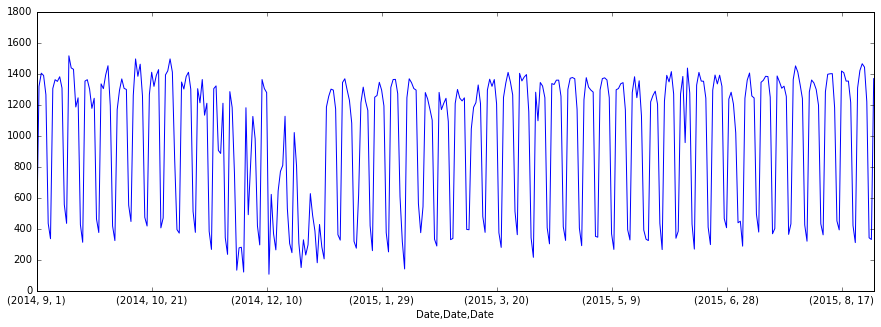

In [247]:
#pd.groupby(df_trip,by=[df_trip.index.year,df_trip.index.month,df_trip.index.day]).size().plot()
###
fig, ax = plt.subplots(1, 1)
#ts = pd.groupby(df4_trip,by=[df4_trip.index.year,df4_trip.index.month,df4_trip.index.day]).size()
ts = pd.groupby(df4_trip,by=[df4_trip['Date'].dt.year,df4_trip['Date'].dt.month,df4_trip['Date'].dt.day]).size()
ts.plot(ax=ax, figsize=(15,5), ylim=(0, 1800), legend=None)

I also want to see where the spikes are coming from. Looks like it is periodic, my initial guess is weekends see less trips. Let us highlight the weekends.

In [325]:
df4_trip['Date'].dt.weekday_name.tail()

354147    Monday
354148    Monday
354149    Monday
354150    Monday
354151    Monday
Name: Date, dtype: object

In [295]:
x = df4_trip
df5_trip = x[x['Date'].dt.dayofweek >=5]
len(df5_trip.index) #dataframe containing just weekends

37654

In [357]:
df6_trip = x[x['Date'].dt.dayofweek <5]
len(df6_trip.index) #dataframe containing just weekdays

316498

In [268]:
len(df4_trip.index)

354152

In [298]:
df5_trip['Date'].head()

1369   2015-08-30 23:42:00
1370   2015-08-30 23:09:00
1371   2015-08-30 22:58:00
1372   2015-08-30 22:47:00
1373   2015-08-30 22:32:00
Name: Date, dtype: datetime64[ns]

In [299]:
df4_trip['Date'].head()

0   2015-08-31 23:26:00
1   2015-08-31 23:11:00
2   2015-08-31 23:13:00
3   2015-08-31 23:10:00
4   2015-08-31 23:09:00
Name: Date, dtype: datetime64[ns]

In [329]:
#df4_trip['Date'].dt.dayofweek
#df4_trip['Date'].dt.weekday_name.tail()
df4_trip[df4_trip['Date'].dt.dayofweek >=5]['Date'].dt.weekday_name.tail()

348402    Saturday
348403    Saturday
348404    Saturday
348405    Saturday
348406    Saturday
Name: Date, dtype: object

In [347]:
ts.head()

Date  Date  Date
2014  9     1        368
            2       1319
            3       1404
            4       1389
            5       1265
dtype: int64

In [350]:
ts.index[0]

(2014, 9, 1)

In [318]:
type(ts.index[1])

tuple

In [340]:
len(ts.index)

365

In [337]:
ax.get_xlim()

(0.0, 364.0)

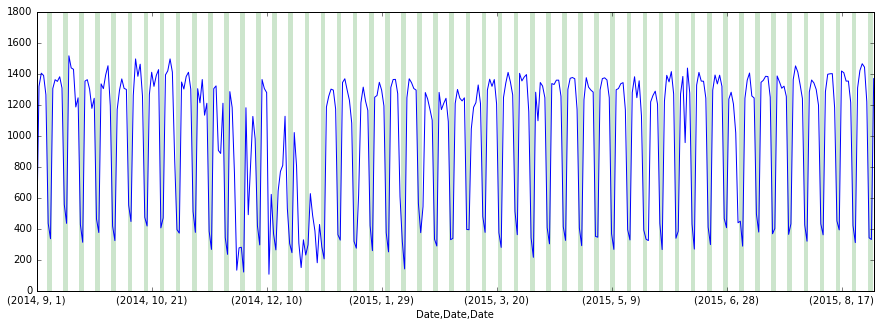

In [352]:
fig, ax = plt.subplots(1, 1)
#ts = pd.groupby(df4_trip,by=[df4_trip.index.year,df4_trip.index.month,df4_trip.index.day]).size()
ts = pd.groupby(df4_trip,by=[df4_trip['Date'].dt.year,df4_trip['Date'].dt.month,df4_trip['Date'].dt.day]).size()

##hack!! We are going to shade the weekends green
i=5 #hard-coded, i =0 is a Monday, so i =5 is a Saturday. Will be nicer to find the weekend automatically
while i < (len(ts.index)):
    ax.axvspan(i-0.5, i+1.5, facecolor='green', edgecolor='none', alpha=.2)
    i = i+7
ts.plot(ax=ax, figsize=(15,5), ylim=(0, 1800), legend=None)
##weekend only
#ts2 = pd.groupby(df5_trip,by=[df5_trip['Date'].dt.year,df5_trip['Date'].dt.month,df5_trip['Date'].dt.day]).size()
#ts2.plot()

Let's look at some statistics for number of trips on weekends and weekdays.

In [355]:
#Weekends
pd.groupby(df5_trip,by=[df5_trip['Date'].dt.year,df5_trip['Date'].dt.month,df5_trip['Date'].dt.day]).size().describe()

count    104.000000
mean     362.057692
std       81.831917
min      121.000000
25%      309.500000
50%      368.000000
75%      418.000000
max      563.000000
dtype: float64

In [358]:
#weekdays
pd.groupby(df6_trip,by=[df6_trip['Date'].dt.year,df6_trip['Date'].dt.month,df6_trip['Date'].dt.day]).size().describe()

count     261.000000
mean     1212.636015
std       271.275480
min       107.000000
25%      1209.000000
50%      1296.000000
75%      1360.000000
max      1516.000000
dtype: float64

In [356]:
#total
pd.groupby(df4_trip,by=[df4_trip['Date'].dt.year,df4_trip['Date'].dt.month,df4_trip['Date'].dt.day]).size().describe()

count     365.000000
mean      970.279452
std       449.745415
min       107.000000
25%       421.000000
50%      1233.000000
75%      1337.000000
max      1516.000000
dtype: float64

Average number of trips on weekends is only about 350, whereas on weekends that is around 1200. This may mean the bicycles are heavily used for commuting to work on weekdays.